# yane : google drive mount & set GDL folder

In [1]:
from google.colab import drive
import os
import sys

if os.path.exists('/content/drive') :
    drive.flush_and_unmount()
drive.mount('/content/drive')

GDL = '/content/drive/MyDrive/GDL_code'

sys.path.append(GDL)

Mounted at /content/drive


# 변이형 오토인코더 훈련

## 라이브러리 임포트

In [2]:
import os

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist

In [3]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
RUN_FOLDER = GDL + RUN_FOLDER

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## 데이터 적재

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## 모델 만들기

In [5]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/autoencoder.weights.h5'))

In [6]:
vae.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_0      │ (None, 28, 28,    │        320 │ encoder_input[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 28, 28,    │          0 │ encoder_conv_0[0… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_1      │ (None, 14, 14,    │     18,496 │ leaky_re_lu[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 14, 14,    │          0 │ encoder_conv_1[0… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_2      │ (None, 7, 7, 64)  │     36,928 │ leaky_re_lu_1[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 7, 7, 64)  │          0 │ encoder_conv_2[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_3      │ (None, 7, 7, 64)  │     36,928 │ leaky_re_lu_2[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 7, 7, 64)  │          0 │ encoder_conv_3[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu (Dense)          │ (None, 2)         │      6,274 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ log_var (Dense)     │ (None, 2)         │      6,274 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ mu[0][0],         │
│                     │                   │            │ log_var[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 105,220 (411.02 KB)

 Trainable params: 105,220 (411.02 KB)

 Non-trainable params: 0 (0.00 B)

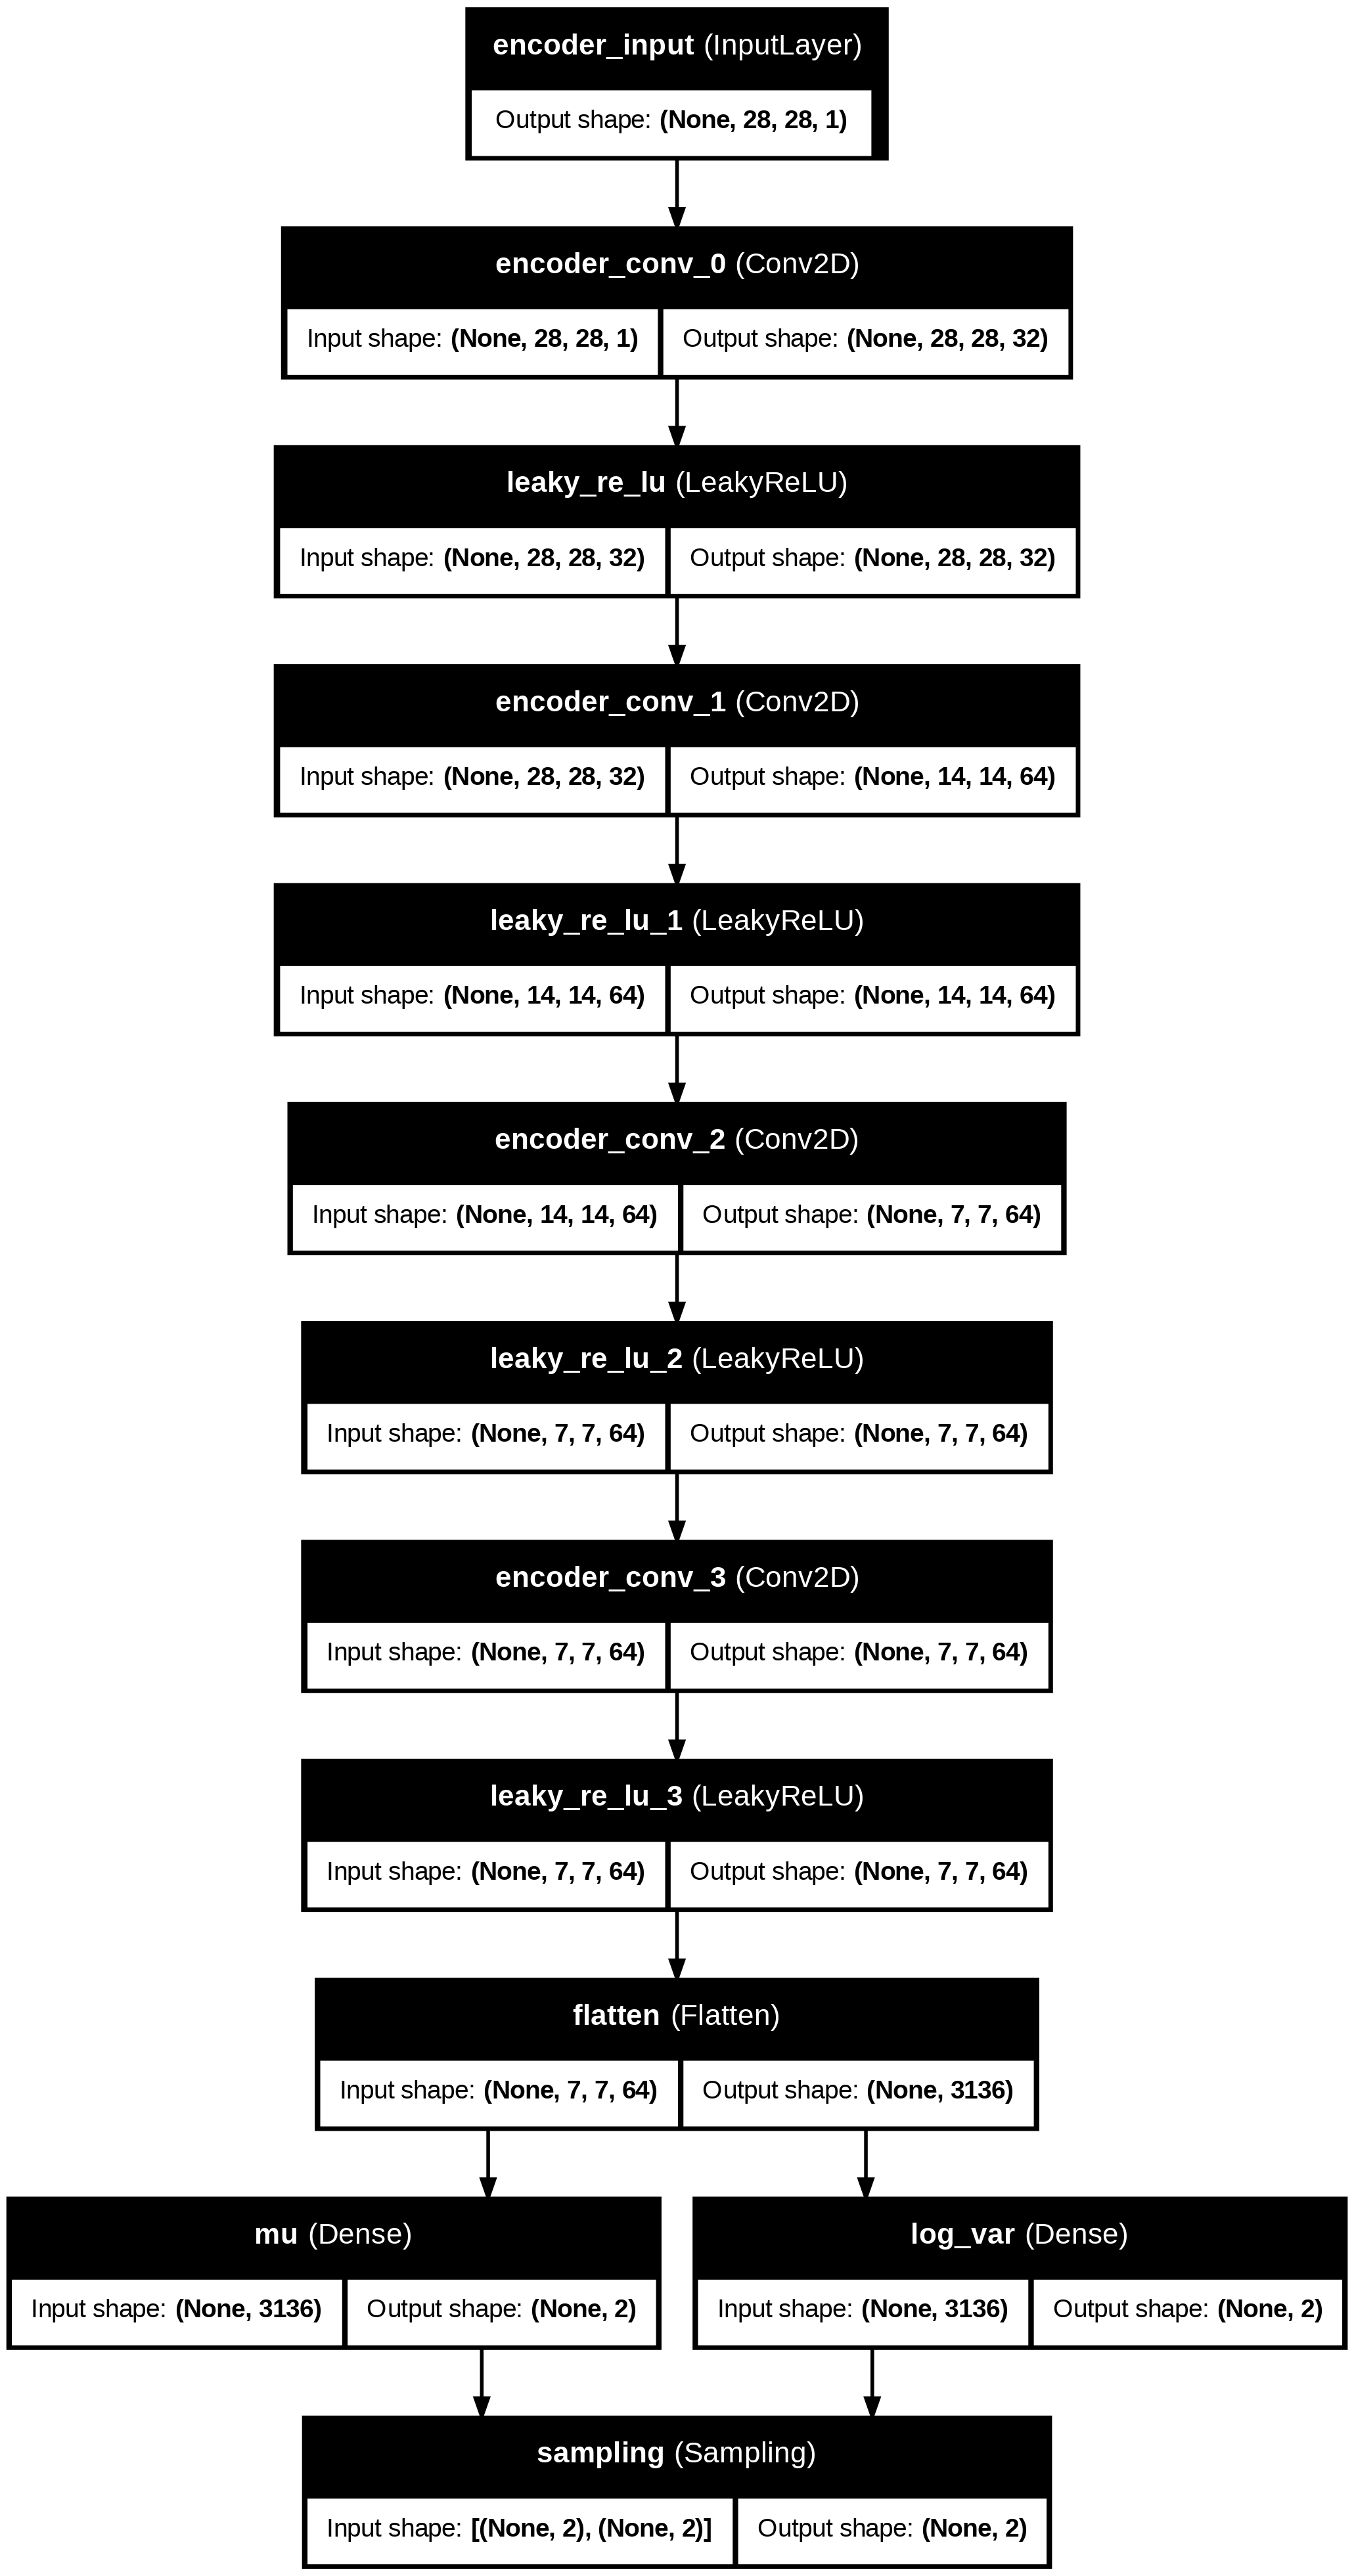

In [7]:
from keras.utils import plot_model
plot_model(vae.encoder, to_file='vae_encoder.png', show_shapes = True, show_layer_names = True)

![VAE Encoder](vae_encoder.png "VAE Encoder")

In [8]:
vae.decoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_t_0                │ (None, 7, 7, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_t_1                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_t_2                │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_t_3                │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,017 (398.50 KB)

 Trainable params: 102,017 (398.50 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 훈련

In [9]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

In [10]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [11]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [12]:
from IPython.display import Javascript

vae.train(
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Javascript('alert("train finished!")')

ValueError: When using `save_weights_only=True` in `ModelCheckpoint`, the filepath provided must end in `.weights.h5` (Keras weights format). Received: filepath=/content/drive/MyDrive/GDL_coderun/vae/0002_digits/weights/weights-{epoch:03d}-{loss:.2f}.h5

아래 코드를 `VAE.py` 파일의 `VariationalAutoencoder` 클래스 정의 내에 추가하거나 기존 코드를 수정하여 오류를 해결할 수 있습니다. 특히 `_build` 메서드와 `sampling` 메서드를 확인해주세요.

In [ ]:
class VariationalAutoencoder():
    # ... (기존 __init__ 메서드 및 다른 부분은 동일)

    # KerasTensor 오류를 해결하기 위한 sampling 메서드
    # tf.random.normal을 사용하여 Keras 텐서와 호환되도록 합니다.
    @staticmethod
    def sampling(args):
        z_mean, z_log_var = args
        # TensorFlow 텐서와 함께 작동하도록 tf.random 사용
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def _build(self):
        ### THE ENCODER
        encoder_input = Input(shape=self.input_dim, name='encoder_input')

        x = encoder_input

        for i in range(self.n_layers_encoder):
            conv_layer = Conv2D(
                filters = self.encoder_conv_filters[i]
                , kernel_size = self.encoder_conv_kernel_size[i]
                , strides = self.encoder_conv_strides[i]
                , padding = 'same'
                , name = 'encoder_conv_'
            )
            x = conv_layer(x)
            if self.use_batch_norm:
                x = BatchNormalization()(x)
            x = LeakyReLU()(x)
            if self.use_dropout:
                x = Dropout(0.25)(x)

        # Flatten output of the last convolutional layer
        shape_before_flattening = tf.shape(x)[1:] # tf.shape for dynamic shape
        x = Flatten()(x)

        # Define z_mean and z_log_var layers
        self.z_mean = Dense(self.z_dim, name='z_mean')(x)
        self.z_log_var = Dense(self.z_dim, name='z_log_var')(x)

        # Use Lambda layer for sampling
        # self.sampling 함수를 Lambda 레이어 안에 래핑하여 Keras 텐서와 호환되게 합니다.
        self.z = Lambda(VariationalAutoencoder.sampling, output_shape=(self.z_dim,), name='z')([self.z_mean, self.z_log_var])

        # Create encoder model
        self.encoder = Model(encoder_input, [self.z, self.z_mean, self.z_log_var], name='encoder')

        ### THE DECODER
        decoder_input = Input(shape=(self.z_dim,), name='decoder_input')

        x = Dense(tf.reduce_prod(shape_before_flattening), name='decoder_dense')(decoder_input)
        x = Reshape(shape_before_flattening)(x)

        for i in range(self.n_layers_decoder):
            conv_t_layer = Conv2DTranspose(
                filters = self.decoder_conv_t_filters[i]
                , kernel_size = self.decoder_conv_t_kernel_size[i]
                , strides = self.decoder_conv_t_strides[i]
                , padding = 'same'
                , name = 'decoder_conv_t_'
            )
            x = conv_t_layer(x)
            if i < self.n_layers_decoder - 1:
                if self.use_batch_norm:
                    x = BatchNormalization()(x)
                x = LeakyReLU()(x)
                if self.use_dropout:
                    x = Dropout(0.25)(x)
            else:
                x = Activation('sigmoid', name='decoder_output')(x)

        self.decoder = Model(decoder_input, x, name='decoder')

        ### THE VAE
        z_recalled = Input(shape=(self.z_dim,), name='z_recalled')
        img_reconstructed = self.decoder(z_recalled)
        self.model = Model(encoder_input, img_reconstructed, name='variational_autoencoder')


이 수정된 코드를 `VAE.py` 파일에 적용한 후 다시 훈련을 시도해 보세요. 이 변경으로 `KerasTensor` 오류가 해결되어야 합니다.